<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/MINIST_Digit_Classification_Using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

Work Flow:

1. Dataset
2. Image Processing
3. Train Test Split
4. Neural Network


Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# Shape of the numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 images

Test data = 10,000 images

Image dimension = 28 X 28

Grayscale Image = 1 channal

In [ ]:
# Printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


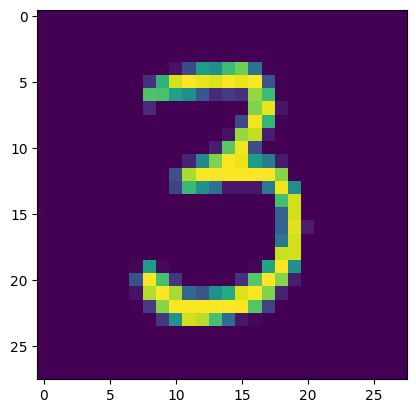

3


In [ ]:
# displaying the image
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

Image Lables

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique value in Y_train
print(np.unique(Y_train))

# unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the Images have the same dimensions in this dataset, If now, we have to resize all the images to a common dimension.

In [ ]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# Setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8484 - loss: 0.5242
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9551 - loss: 0.1539
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9677 - loss: 0.1107
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9745 - loss: 0.0874
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9788 - loss: 0.0718
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0603
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9847 - loss: 0.0514
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9870 - loss: 0.0446
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9893 - loss: 0.0383
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0343


Training data accuracy = 99.01%

**Accuracy on Test data**

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1512
0.9682999849319458


Test data accuracy = 96.8%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


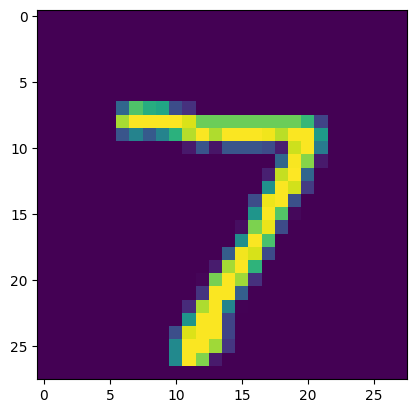

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[1.9571651e-05 2.5003511e-02 6.5307043e-02 9.8065484e-01 3.6085774e-07
 7.2846382e-07 9.3860830e-10 9.9999958e-01 5.3096223e-03 7.9890037e-01]


model.predict() gives the prediction probability of each class for that data point.

In [ ]:
# Converting the prediction probabilities to class label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


It implies that the value in the index 7 is maximum.

In [ ]:
# Converting the prediction probailitiy to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 9, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[1.9571651e-05 2.5003511e-02 6.5307043e-02 ... 9.9999958e-01
  5.3096223e-03 7.9890037e-01]
 [3.8603954e-03 9.7666407e-01 1.0000000e+00 ... 1.8382830e-10
  8.5503370e-01 3.2288353e-11]
 [4.9114228e-06 9.9954730e-01 3.8462713e-02 ... 7.9754227e-01
  1.7550728e-01 7.2984846e-04]
 ...
 [7.8801419e-09 1.2376546e-12 2.9756371e-11 ... 3.2345345e-03
  8.5590575e-03 8.3785444e-01]
 [3.3388215e-08 5.9730676e-10 3.7694745e-10 ... 1.4232089e-06
  8.2003683e-01 4.1042213e-07]
 [1.1239523e-05 2.7663446e-11 2.1879492e-07 ... 5.7619938e-05
  1.6610338e-08 2.0444901e-04]]


Y_test -> True labels

Y_pred_labels -> Predicted labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 956    0    2    1    5    3    5    0    2    6]
 [   0 1121    2    2    0    0    2    3    4    1]
 [   2    1  988    9   11    0    5    7    8    1]
 [   1    0    7  979    0    8    0    9    2    4]
 [   0    0    2    0  972    0    1    2    0    5]
 [   4    1    0   16    6  839    7    4    3   12]
 [   2    2    1    0    9    2  941    0    1    0]
 [   0    1    5    2    4    0    0 1006    2    8]
 [   2    1    2   19   13    7    8    6  904   12]
 [   1    2    0    4   20    2    0    3    0  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

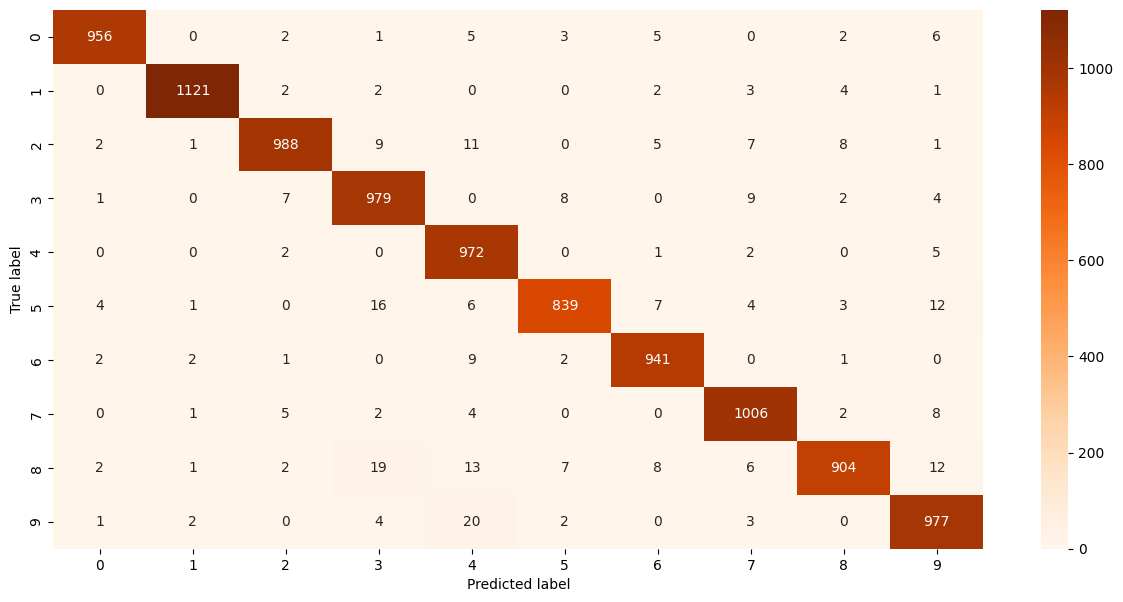

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Building a predictive system

In [33]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [34]:
type(input_image)

numpy.ndarray

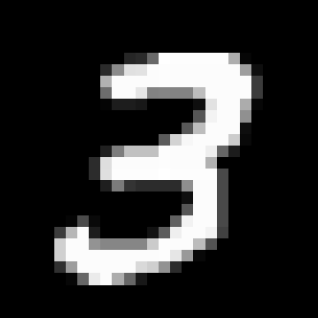

In [35]:
cv2_imshow(input_image)

In [36]:
input_image.shape

(318, 318, 3)

In [40]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [41]:
grayscale.shape

(318, 318)

In [42]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [43]:
cv2_imshow(input_image_resize)

In [44]:
# Scaling the values
input_image_resize = input_image_resize/255

In [45]:
image_reshape = np.reshape(input_image_resize,[1,28,28])

In [46]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[4.2734932e-10 9.8781056e-06 2.0946862e-04 1.0000000e+00 1.9160947e-08
  1.6970248e-06 3.9347899e-16 4.1466508e-05 2.8136197e-01 9.9555945e-01]]


In [47]:
input_pred_label = np.argmax(input_prediction)

In [48]:
print(input_pred_label)

3


**Predictive System**

Path of the imaege to be predicted: /content/MNIST_digit.png


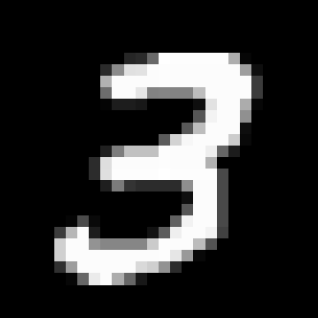

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The Handwritten Digit is recognized as : 3


In [49]:
input_image_path = input("Path of the imaege to be predicted: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize,[1,28,28])

input_prediction = model.predict(image_reshape)

input_pred_label = np.argmax(input_prediction)

print("The Handwritten Digit is recognized as :",input_pred_label)